# Lógica Difusa

La Lógica Difusa proporciona un mecanismo de inferencia que permite simular los procedimientos de razonamiento humano en sistemas basados en el conocimiento. La teoría de la lógica difusa proporciona un marco matemático que permite modelar la incertidumbre de los procesos cognitivos humanos de forma que pueda ser tratable por un computador.


## Conjunto difuso


En la teoría clásica de conjuntos crisp un conjunto C se define sobre X mediante la función característica de
$C$ como $f_C$.


<img src="imgs/f1.png" width="20%">

Este conjunto mapea el universo $X$ en un conjunto de dos elementos, donde la función $f_C(x)$ es $1$ si el elemento $x$ pertenece al conjunto $C$ y $0$ si el elemento $x$ no pertenece al conjunto $C$. Si generalizamos esta función para que los valores asignados a los elementos del conjunto caigan en un rango particular y así indicar el grado de pertenencia de los elementos a ese conjunto, tendremos una **función de pertenencia** de un determinado conjunto difuso. La
función de pertenencia $\mu_A$ por la que se define un conjunto difuso A, sería:

$$ \mu_A = X \rightarrow [0, 1]$$

Donde $\mu_A(x) = 1$ si $x$ está totalmente en $A$, $\mu_A(x) = 0$ si $x$ no está en $A$ y $0 < \mu_A(x) < 1$ si $x$ está parcialmente en $A$. Este valor entre $0$ y $1$ representa el grado de pertenencia (también llamado valor de
pertenencia de un elemento $x$ a un conjunto $A$.

<img src="imgs/conjuntos.jpg" width="50%">


## Operaciones con conjuntos difusos

Las tres operaciones básicas que se definen sobre conjuntos crisp (complemento, unión e intersección), pueden generalizarse de varias formas en conjuntos difusos. No obstante, existe una generalización particular que tiene especial importancia. Cuando se restringe el rango de pertenencia al conjunto $[0, 1]$, estas operaciones "estándar" sobre conjuntos difusos se comportan de igual modo que las operaciones sobre conjuntos crisp.


### Complemento

Su forma más básica es: $1-x$

### Unión

Tenemos tres formas principales de definir la unión:

- Máximo: $max(a, b)$
- Producto: $(a + b) - (a \times b)$
- Suma limitada (o de Lukasiewick): $min(a + b, 1)$

### Intersección

También tenemos varias formas de definirla:

- Mínimo: $min(a, b)$
- Producto algebraico: $a \times b$
- Diferencia limitada (o de Lukasiewick): $max(0, a + b - 1)$

<img src="imgs/operaciones.png" width="30%">



## Reglas difusas

Mediante el uso de conjuntos difusos es posible dotar de significado matemático a proposiciones como "este coche es pequeño", "Pedro es alto" o "el crecimiento es lento". Las reglas difusas se utilizan para representar y razonar
con conocimiento expresado en forma de primitivas enunciadas en lenguaje natural. La inferencia difusa puede definirse como el proceso de obtener un valor de salida para un valor de entrada empleando la teoría de conjuntos difusos.

### Inferencia de Mamdani

Es posiblemente el método más ampliamente utilizado, propuesto por Ebrahim Mamdani en 1975. El proceso se realiza en cuatro pasos:

1. Fuzificación de las variables de entrada.
2. Evaluación de las reglas.
3. Agregación de las salidas de las reglas.
4. Defuzificación.

<img src="imgs/proceso.png">

-----------------------------------

# Tip Example

Vamos a crear un sistema de **control difuso** que modele cómo calcular la propina en un restaurante. Se considerará el servicio y la calidad de los alimentos, valorados entre 0 y 10. Y se dejará una propina de entre 0 y 25%.

La formulación de este problema sería:

* **Antecedentes (Entradas)**
    + Servicio: Universo (es decir, rango de valores nítidos): ¿Qué tan bueno fue el servicio del personal, en una escala de 0 a 10?
    Conjunto difuso (es decir, rango de valores difusos): pobre, aceptable, excelente

    + Calidad alimentaria: Universo: ¿Qué tan buena estaba la comida, en una escala de 0 a 10?
    Conjunto difuso: mala, buena, exquisita


* **Consecuentes (Salidas)**
    + Propina: Universo: ¿Cuánta propina debemos dejar, en una escala de 0% a 25%?
    Fuzzy set: baja, media, alta


* **Reglas**
    + Si el servicio era excelente o la calidad de la comida era buena, entonces la propina será alta.
    + Si el servicio fue aceptable, la propina será media.
    + Si el servicio fue pobre y la calidad de la comida mala, entonces la propina será baja.


* **Uso**
    + Si le pedimos a este controlador que calcule la propina, siendo el servicio un 9.8 y la calidad un 6.5, éste nos recomendaría una propina de un 20,2%.

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 0.1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

Para ver gráficamente los conjuntos de membresía

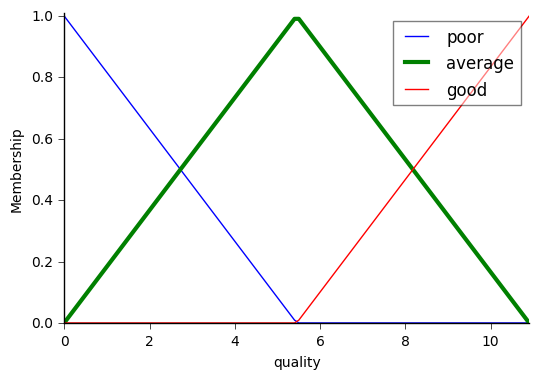

In [11]:
# You can see how these look with .view()
quality['average'].view()

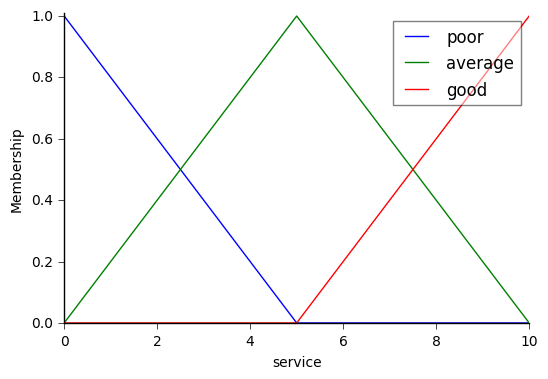

In [85]:
service.view()

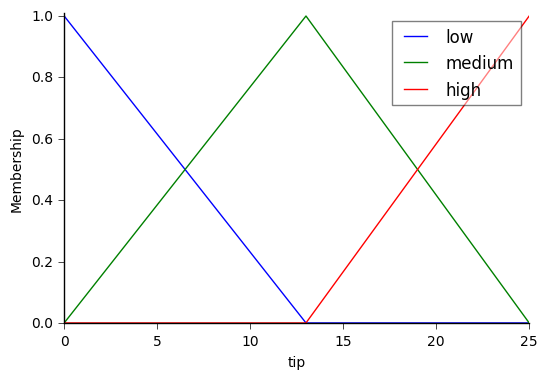

In [9]:
tip.view()

## Reglas borrosas
Ahora, para hacer que estos triángulos sean útiles, definimos la relación difusa entre las variables de entrada y salida. Para los propósitos de nuestro ejemplo, considere tres reglas simples:

* Si la comida es mala O el servicio es pobre, entonces la propina será baja
* Si el servicio es regular, entonces la propina será mediana
* Si la comida es buena O el servicio es bueno, entonces la propina será alta.

La mayoría de las personas estarían de acuerdo con estas reglas, aunque las reglas sean confusas. El reto es mapear reglas difusas en un cálculo preciso de la propina. Esta es la principal ventaja de la lógica difusa.

In [45]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] & quality['good'], tip['high'])

In [46]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [47]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [50]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 10
tipping.input['service'] = 7

# Crunch the numbers
tipping.compute()

13.5348837209


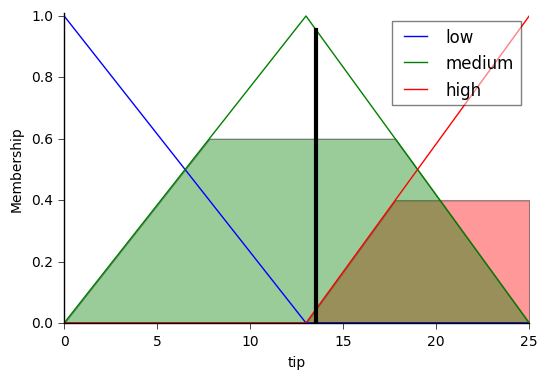

In [51]:
print tipping.output['tip']
tip.view(sim=tipping)

# Frenado del coche


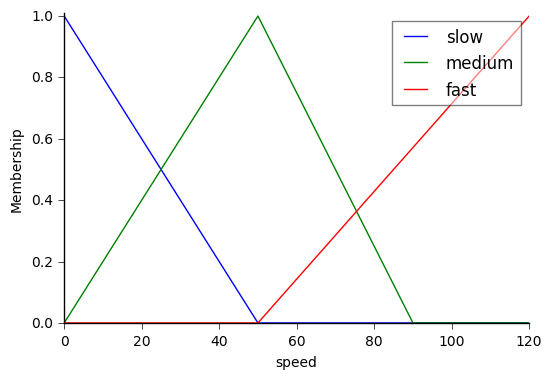

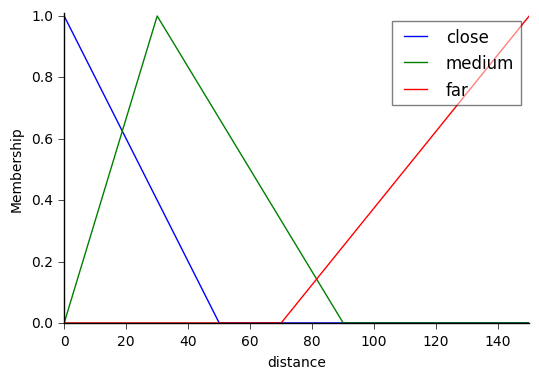

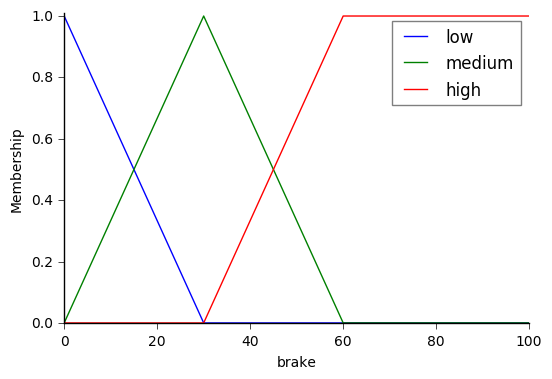

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

speed = ctrl.Antecedent(np.arange(0, 121, 1), 'speed')
distance = ctrl.Antecedent(np.arange(0, 151, 1), 'distance')
#brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake', defuzzify_method="lom")
brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake', defuzzify_method="mom")
#brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

# Auto-membership function population is possible with .automf(3, 5, or 7)
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 90])
speed['fast'] = fuzz.trimf(speed.universe, [50, 120, 120])

distance['close'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['medium'] = fuzz.trimf(distance.universe, [0, 30, 90])
distance['far'] = fuzz.trimf(distance.universe, [70, 150, 150])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
brake['low'] = fuzz.trimf(brake.universe, [0, 0, 30])
brake['medium'] = fuzz.trimf(brake.universe, [0, 30, 60])
brake['high'] = fuzz.trapmf(brake.universe, [30, 60, 100, 100])

speed.view()
distance.view()
brake.view()

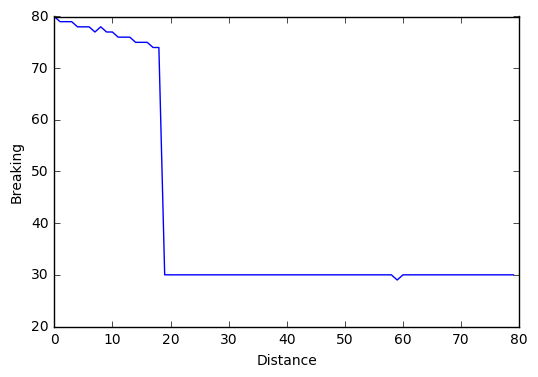

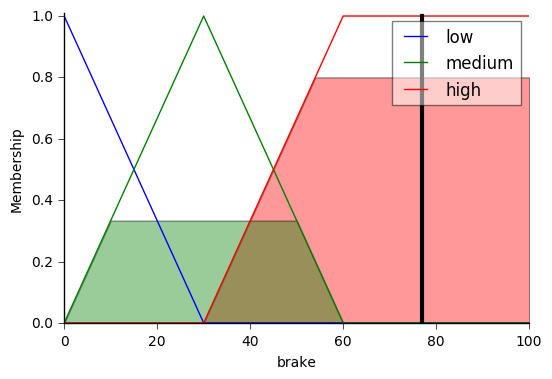

In [10]:
#rule1 = ctrl.Rule(distance['close'] & (speed['fast'] | speed['medium']), brake['high'])
#rule2 = ctrl.Rule(distance['close'] & (speed['slow']), brake['medium'])

rule1 = ctrl.Rule(distance['close'] & (speed['fast']), brake['high'])
rule2 = ctrl.Rule(distance['close'] & (speed['medium']), brake['high'])
rule3 = ctrl.Rule(distance['medium'] & (speed['medium']), brake['medium'])
rule4 = ctrl.Rule(distance['medium'] & (speed['fast']), brake['high'])

#rule3 = ctrl.Rule(distance['medium'] & speed['medium'], brake['medium'])
#rule4 = ctrl.Rule(distance['far'], brake['low'])


braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
breaking = ctrl.ControlSystemSimulation(braking_ctrl)

b = []

breaking.input['speed'] = 50

for d in range(0, 80):
    breaking.input['distance'] = d
    breaking.compute()
    b.append(int(breaking.output['brake']))
    

plt.ylabel("Breaking")
plt.xlabel("Distance")
plt.plot(b)

breaking.input['speed'] = 50
breaking.input['distance'] = 10
brake.view(sim=breaking)




## Parámetros de defuzzificación

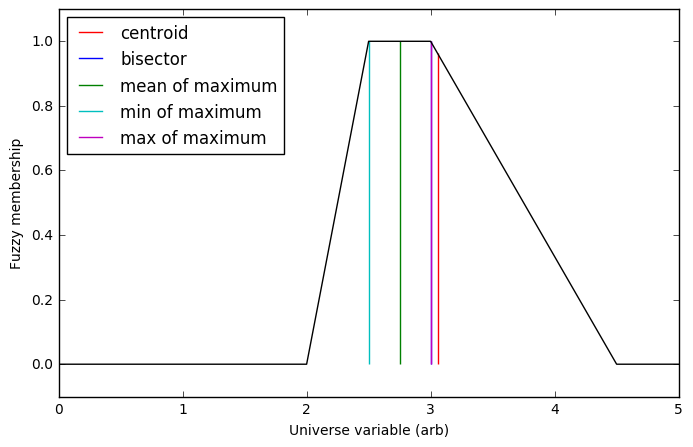

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
    
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()